In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [18]:
def get_articles_from_site(site: str) -> pd.DataFrame:
    site_frame = pd.read_json(f'data/{site}.jsonl.gz', lines=True)
    site_frame.date_of_creation = pd.to_datetime(site_frame.date_of_creation)
    site_frame.cc_date = pd.to_datetime(site_frame.cc_date)
    site_frame['article_length'] = site_frame.article.apply(lambda x: len(x))
    site_frame['word_count'] = site_frame.article.apply(lambda x: len(x.split()))
    return site_frame

In [19]:
telex = get_articles_from_site('telex')
index = get_articles_from_site('index')
ac24 = get_articles_from_site('ac24')
parlamentnilisty = get_articles_from_site('parlamentnilisty')

In [4]:
telex

,uuid,article,domain,url,date_of_creation,cc_date,article_length,word_count
0,8c6c70e3-ecb7-4d19-90e1-cb802f3a8277,Kibontotta egy jászkiséri ház falát az a betör...,telex.hu,https://telex.hu/belfold/2020/12/30/kibontotta...,2020-12-30 17:15:00,2021-12-09 12:57:43,586,86
1,c5778d98-cc56-4a0b-a38f-af1264b88392,A Meta (leánykori nevén Facebook) bejelentette...,telex.hu,https://telex.hu/tech/2021/12/13/facebook-elo-...,2021-12-13 10:29:00,2022-01-16 10:13:40,1343,177
2,0bb55374-8709-46aa-a431-509197fda655,Egy 29 éves sajókazai férfi betört egy alsószu...,telex.hu,https://telex.hu/belfold/2021/02/05/egy-motorl...,2021-02-05 05:48:00,2021-12-09 14:18:38,327,50
3,4c94489c-2ec0-4765-bb76-f2d87d22068c,A kormányülésen áttekintették az ország gazdas...,telex.hu,https://telex.hu/belfold/2022/01/13/6-5-7-szaz...,2022-01-13 11:28:00,2022-01-16 09:45:58,305,45
4,9c42d233-8ce2-4e5b-bfb5-cc3d17a45864,"A keleti lépcsőnél, két különböző autóból kilé...",telex.hu,https://telex.hu/kulfold/2021/01/20/joe-biden-...,2021-01-20 16:32:00,2021-12-09 13:12:48,136,18
...,...,...,...,...,...,...,...,...
49892,7e2edde0-2585-4506-92a8-64f790a3b32c,Katalin és Vilmos szinte soha nem szegik meg a...,telex.hu,https://telex.hu/zacc/2023/02/19/katalin-herce...,2023-02-19 21:18:00,2023-04-02 04:40:36,869,129
49893,187aa39f-32d3-4a64-9dd9-c86783bb1638,Több forrás szerint is akadozik a kormány terv...,telex.hu,https://telex.hu/kulfold/2023/03/06/eu-tamogat...,2023-03-06 18:32:00,2023-04-02 05:33:39,9700,1248
49894,5405e7c4-0259-4343-bb0a-80f3499c50ad,"0-0-ról folytatjuk, elkönyvelhetünk egy albán ...",telex.hu,https://telex.hu/sport/2021/10/09/indul-a-maso...,2021-10-09 21:50:00,2023-04-02 06:23:53,104,13
49895,8823b254-12d7-4593-80a2-ab8918ccfe7d,"Ezúttal nem volt les, Gulácsi bravúrral védte ...",telex.hu,https://telex.hu/sport/2021/10/09/megint-uzuni...,2021-10-09 22:07:00,2023-04-02 05:25:11,439,66


In [5]:
def save_article_length_distribution(site: pd.DataFrame, name: str) -> None:
    plt.figure(figsize=(10, 6))
    sns.histplot(site.article_length, bins=100)
    plt.yscale('log')
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f'Distribution of article length on {name}')
    plt.xlabel('Article length')
    plt.ylabel('Number of articles')
    plt.savefig(f'figures/{name}_article_length_distribution.png')
    plt.show()
    plt.close()

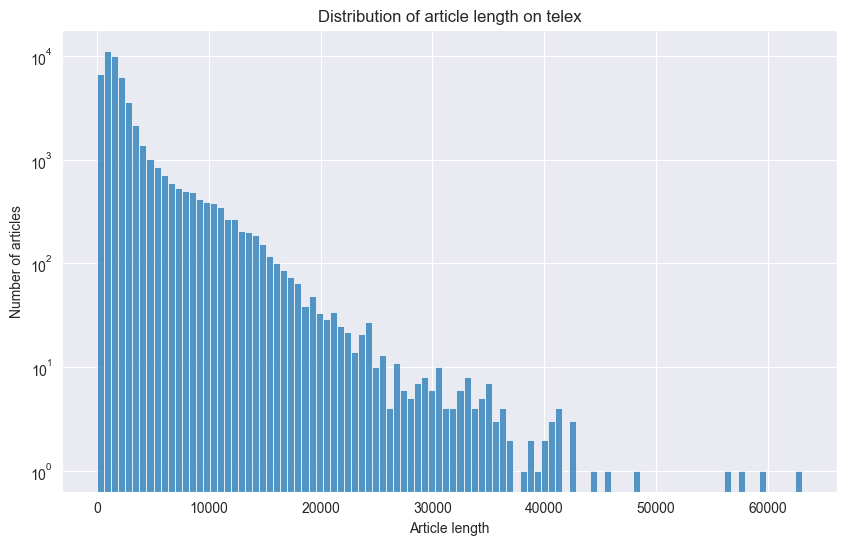

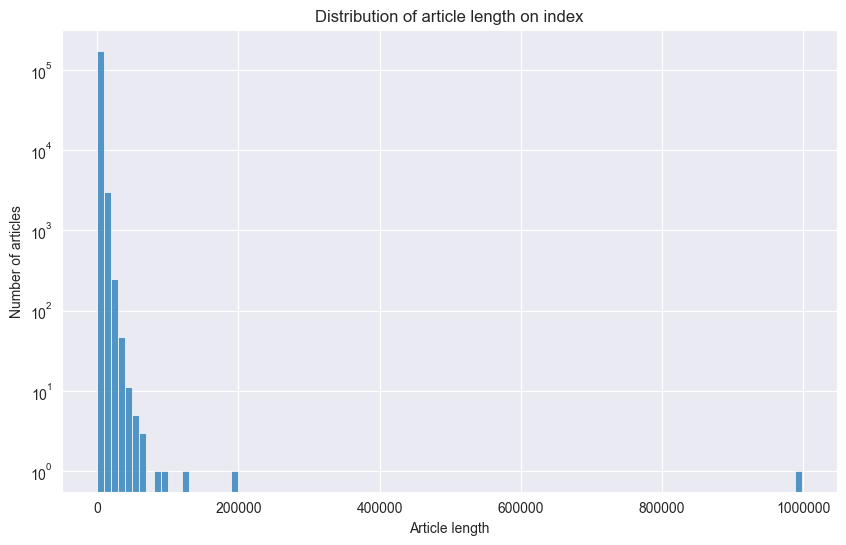

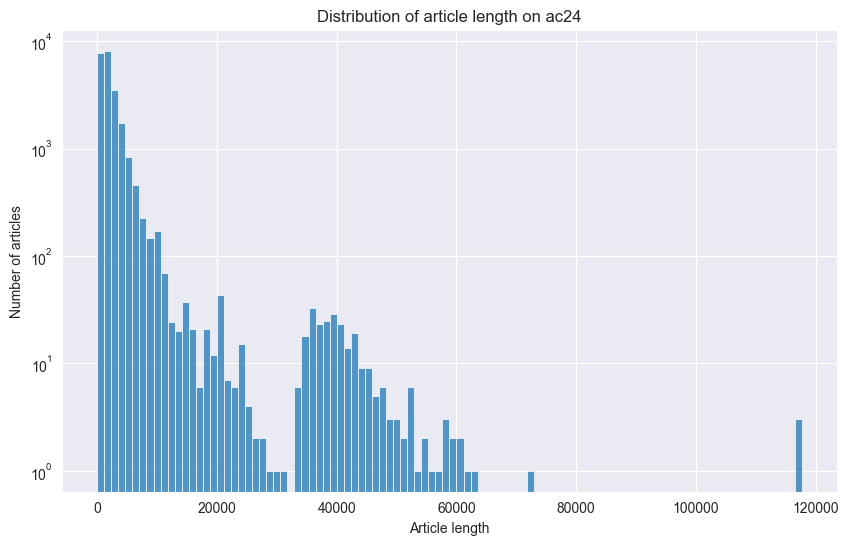

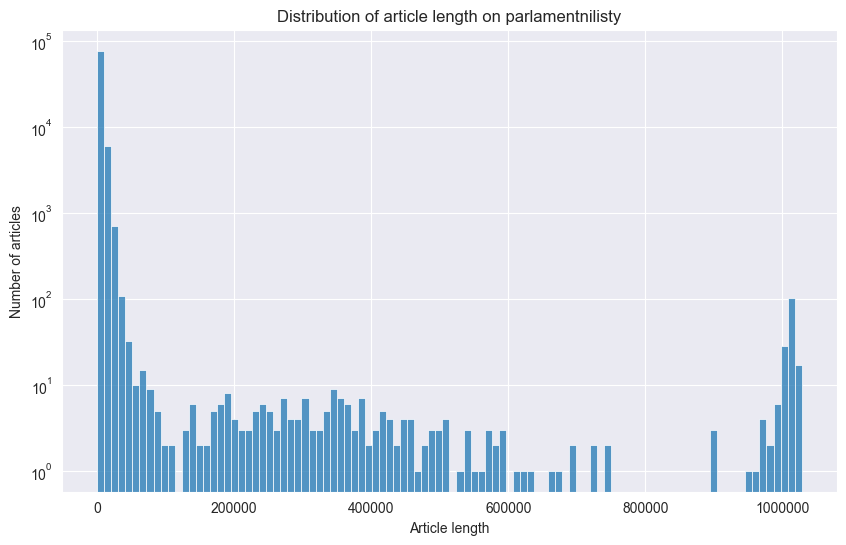

In [6]:
save_article_length_distribution(telex, 'telex')
save_article_length_distribution(index, 'index')
save_article_length_distribution(ac24, 'ac24')
save_article_length_distribution(parlamentnilisty, 'parlamentnilisty')

In [7]:
def save_word_count_distribution(site: pd.DataFrame, name: str) -> None:
    plt.figure(figsize=(10, 6))
    sns.histplot(site.word_count, bins=100)
    plt.yscale('log')
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f'Distribution of word count on {name}')
    plt.xlabel('Word count')
    plt.ylabel('Number of articles')
    plt.savefig(f'figures/{name}_word_count_distribution.png')
    plt.show()
    plt.close()

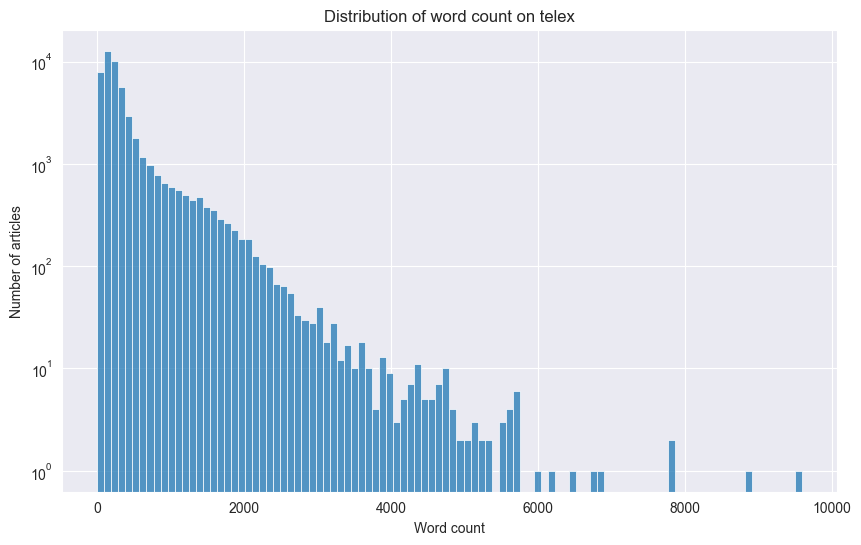

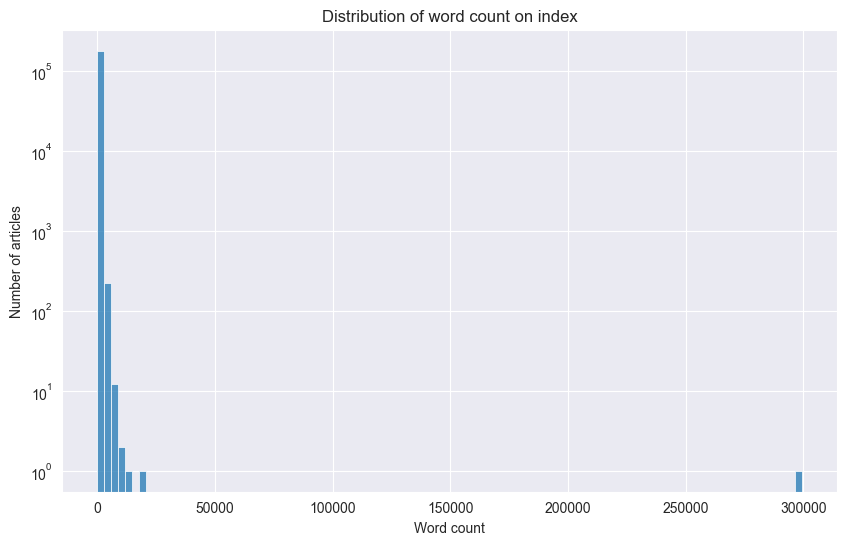

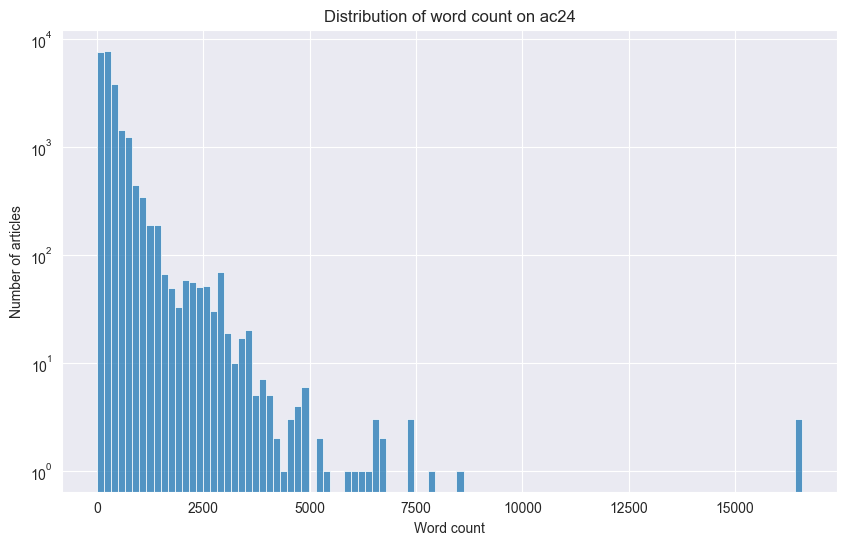

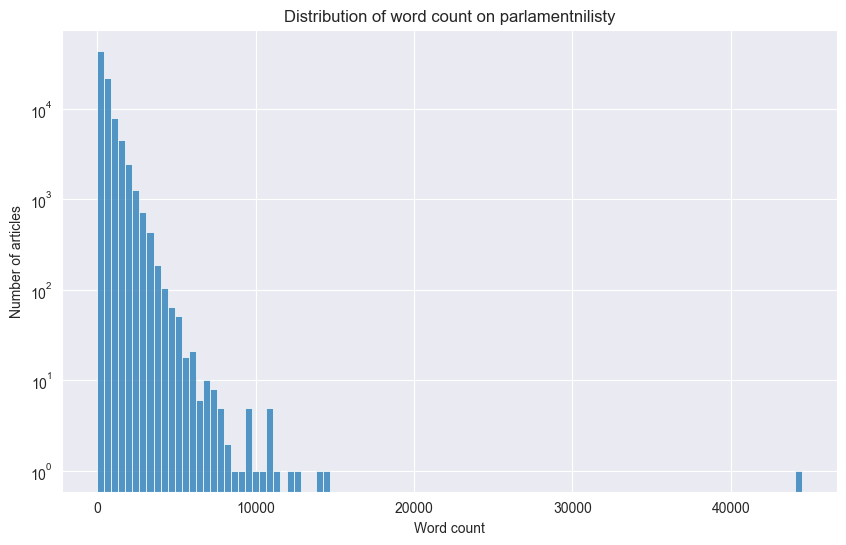

In [8]:
save_word_count_distribution(telex, 'telex')
save_word_count_distribution(index, 'index')
save_word_count_distribution(ac24, 'ac24')
save_word_count_distribution(parlamentnilisty, 'parlamentnilisty')

In [9]:
def save_overall_article_length_distribution(sites: List[pd.DataFrame]) -> None:
    plt.figure(figsize=(10, 6))
    data = pd.concat(sites)
    sns.histplot(data.article_length, bins=100)
    plt.yscale('log')
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Distribution of article length on all sites')
    plt.xlabel('Article length')
    plt.ylabel('Number of articles')
    plt.savefig(f'figures/overall_article_length_distribution.png')
    plt.show()
    plt.close()

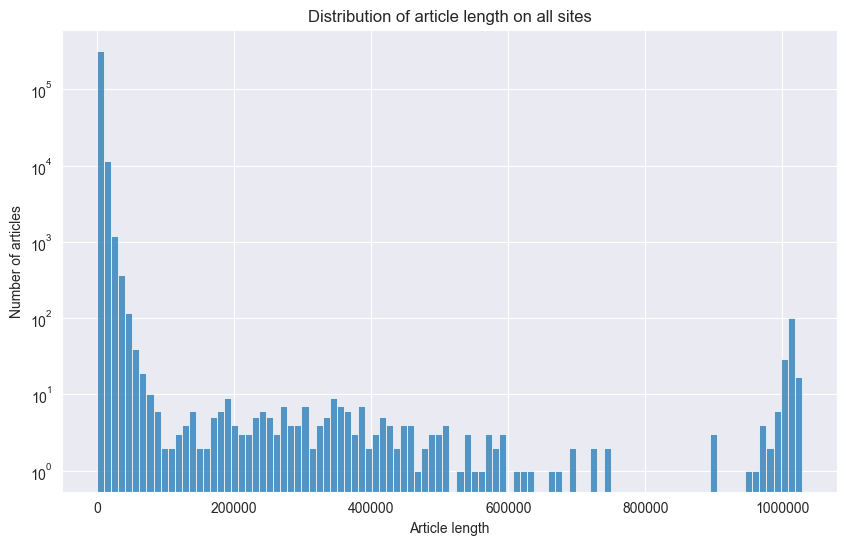

In [10]:
save_overall_article_length_distribution([telex, index, ac24, parlamentnilisty])

In [11]:
def save_overall_word_count_distribution(sites: List[pd.DataFrame]) -> None:
    plt.figure(figsize=(10, 6))
    data = pd.concat(sites)
    sns.histplot(data.word_count, bins=100)
    plt.yscale('log')
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Distribution of word count on all sites')
    plt.xlabel('Word count')
    plt.ylabel('Number of articles')
    plt.savefig(f'figures/overall_word_count_distribution.png')
    plt.show()
    plt.close()

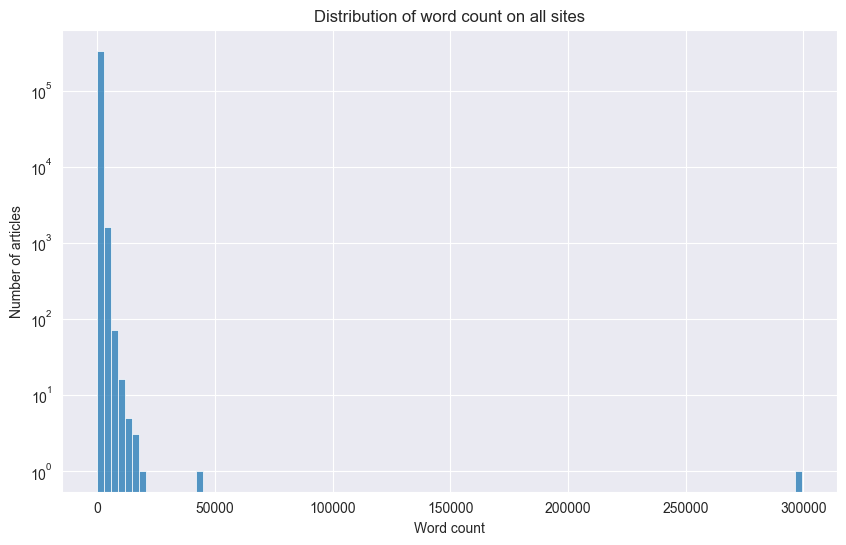

In [12]:
save_overall_word_count_distribution([telex, index, ac24, parlamentnilisty])

In [13]:
def save_article_length_stats(sites: List[pd.DataFrame], names: List[str]) -> None:
    data = pd.concat(sites)
    data = data.groupby('domain').article_length.describe()
    data = data.rename(index=dict(zip(range(4), names)))
    data['count'] = data['count'].astype(int)
    data['min'] = data['min'].astype(int)
    data['25%'] = data['25%'].astype(int)
    data['50%'] = data['50%'].astype(int)
    data['75%'] = data['75%'].astype(int)
    data['max'] = data['max'].astype(int)
    data.to_csv('tables/article_length_stats.csv', index=True)

In [14]:
save_article_length_stats([telex, index, ac24, parlamentnilisty], ['telex', 'index', 'ac24', 'parlamentnilisty'])

In [15]:
def save_atricle_word_count_stats(sites: List[pd.DataFrame], names: List[str]) -> None:
    data = pd.concat(sites)
    data = data.groupby('domain').word_count.describe()
    data = data.rename(index=dict(zip(range(4), names)))
    data['count'] = data['count'].astype(int)
    data['min'] = data['min'].astype(int)
    data['25%'] = data['25%'].astype(int)
    data['50%'] = data['50%'].astype(int)
    data['75%'] = data['75%'].astype(int)
    data['max'] = data['max'].astype(int)
    data.to_csv('tables/article_word_count_stats.csv', index=True)

In [16]:
save_atricle_word_count_stats([telex, index, ac24, parlamentnilisty], ['telex', 'index', 'ac24', 'parlamentnilisty'])

In [17]:
def plot_article_length_distribution_by_year(sites: List[pd.DataFrame], title) -> None:
    data = pd.concat(sites)
    data['year'] = data.date_of_creation.dt.year
    data = data.groupby('year')['uuid'].count()
    data = data.reindex(data.index.astype(int))
    data = data.rename('count')
    data = data[data.index <= 2023]
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Number of articles')
    plt.savefig(f'figures/{title.replace(" ", "_")}.png')
    plt.show()
    plt.close()

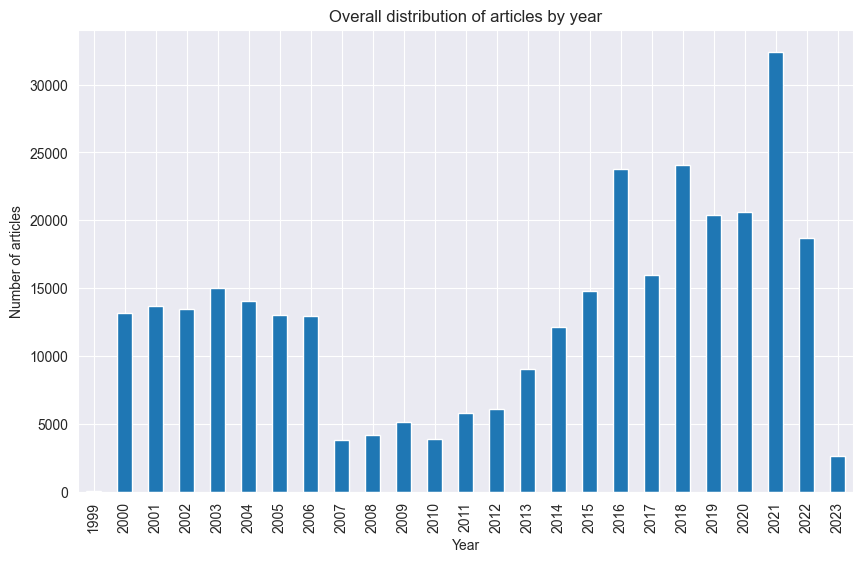

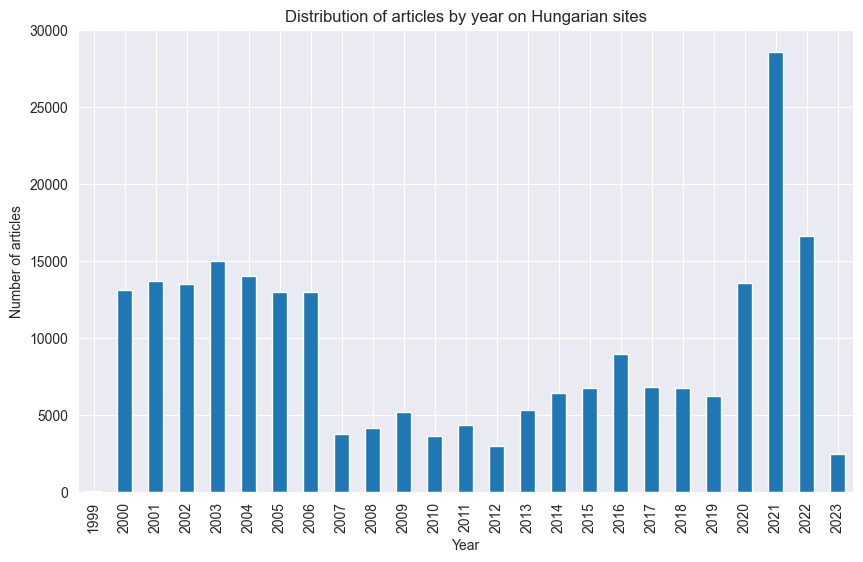

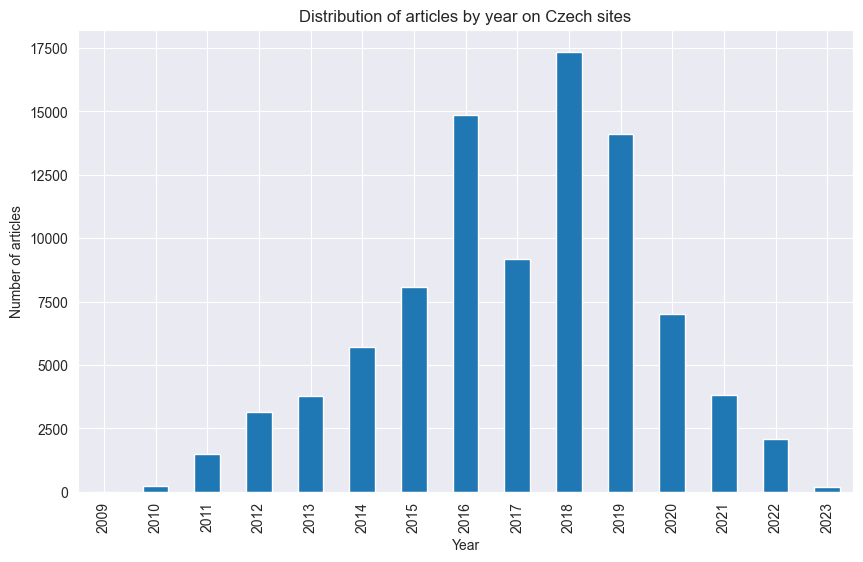

In [18]:
plot_article_length_distribution_by_year([telex, index, ac24, parlamentnilisty], 'Overall distribution of articles by year')
plot_article_length_distribution_by_year([telex, index], 'Distribution of articles by year on Hungarian sites')
plot_article_length_distribution_by_year([ac24, parlamentnilisty], 'Distribution of articles by year on Czech sites')

In [14]:
from aalto_news_gen.utils.config_reader import get_config_from_yaml
from aalto_news_gen.utils.lang_detector import LanguageDetector
from pandarallel import pandarallel

In [29]:
def clean_sites(sites: List[pd.DataFrame], names: List[str]) -> None:
    config = get_config_from_yaml('preprocess_config.yaml')
    lang_detector = LanguageDetector(config['lang_detector_model_path'])
    pandarallel.initialize(nb_workers=config.num_process)
    for site, name in zip(sites, names):
        site_clean = site[(site['article_length'] >= config.min_article_len) & (site['article_length'] <= config.max_article_len)]
        site_clean = site_clean[site_clean['word_count'] >= config.min_article_words]
        site_clean['language'] = site_clean.apply(lambda x: lang_detector.predict(x['article'].replace('\n', ' ')), axis=1)
        site_clean = site_clean[(site_clean['language'] == 'hu') | (site_clean['language'] == 'cs') | (site_clean['language'] == 'sk')]
        site_clean.to_json(f'{config.clean_out_dir}/{name}.jsonl.gz', orient='records', lines=True, compression='gzip')

In [30]:
clean_sites([telex, index, ac24, parlamentnilisty], ['telex', 'index', 'ac24', 'parlamentnilisty'])

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [31]:
telex_clean = pd.read_json('data/clean/telex.jsonl.gz', orient='records', lines=True, compression='gzip')
index_clean = pd.read_json('data/clean/index.jsonl.gz', orient='records', lines=True, compression='gzip')
ac24_clean = pd.read_json('data/clean/ac24.jsonl.gz', orient='records', lines=True, compression='gzip')
parlamentnilisty_clean = pd.read_json('data/clean/parlamentnilisty.jsonl.gz', orient='records', lines=True, compression='gzip')

In [32]:
def save_clean_article_length_distribution(sites: List[pd.DataFrame], names: List[str]) -> None:
    plt.figure(figsize=(10, 6))
    data = pd.concat(sites)
    sns.histplot(data.article_length, bins=100)
    plt.yscale('log')
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Distribution of article length on all sites')
    plt.xlabel('Article length')
    plt.ylabel('Number of articles')
    plt.savefig(f'figures/clean_article_length_distribution.png')
    plt.show()
    plt.close()

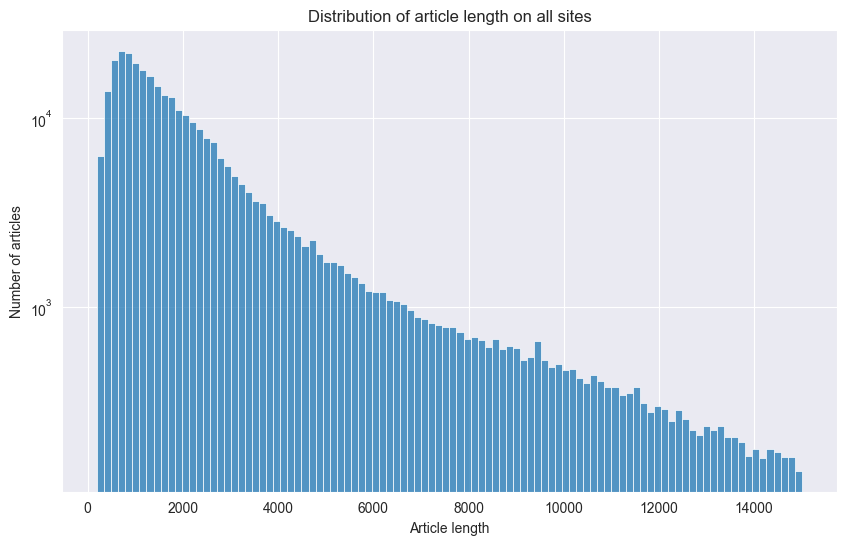

In [33]:
save_clean_article_length_distribution([telex_clean, index_clean, ac24_clean, parlamentnilisty_clean], ['telex', 'index', 'ac24', 'parlamentnilisty'])

In [34]:
def save_clean_article_word_count_distribution(sites: List[pd.DataFrame], names: List[str]) -> None:
    plt.figure(figsize=(10, 6))
    data = pd.concat(sites)
    sns.histplot(data.word_count, bins=100)
    plt.yscale('log')
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Distribution of article word count on all sites')
    plt.xlabel('Article word count')
    plt.ylabel('Number of articles')
    plt.savefig(f'figures/clean_article_word_count_distribution.png')
    plt.show()
    plt.close()

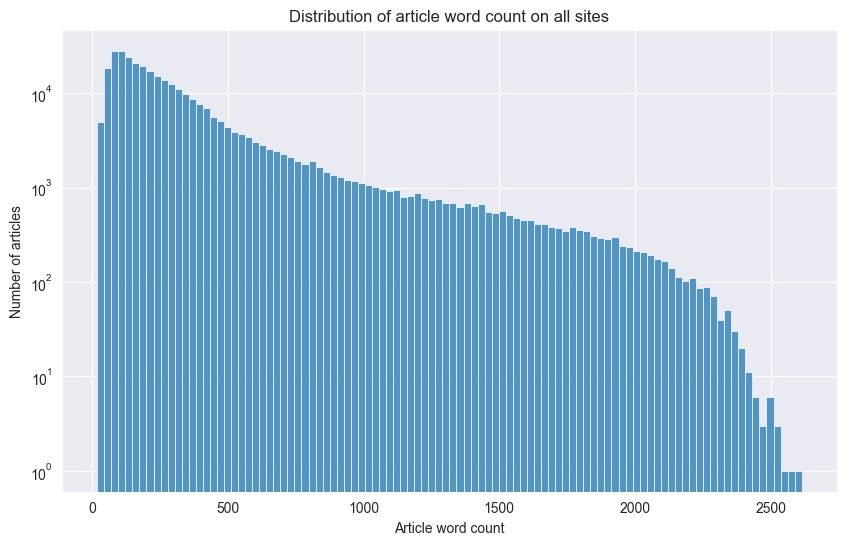

In [35]:
save_clean_article_word_count_distribution([telex_clean, index_clean, ac24_clean, parlamentnilisty_clean], ['telex', 'index', 'ac24', 'parlamentnilisty'])

In [36]:
def save_clean_article_length_stats(sites: List[pd.DataFrame], names: List[str]) -> None:
    data = pd.concat(sites)
    data = data.groupby('domain').article_length.describe()
    data = data.rename(index=dict(zip(range(4), names)))
    data['count'] = data['count'].astype(int)
    data['min'] = data['min'].astype(int)
    data['25%'] = data['25%'].astype(int)
    data['50%'] = data['50%'].astype(int)
    data['75%'] = data['75%'].astype(int)
    data['max'] = data['max'].astype(int)
    data.to_csv('tables/clean_article_length_stats.csv', index=True)

In [37]:
save_clean_article_length_stats([telex_clean, index_clean, ac24_clean, parlamentnilisty_clean], ['telex', 'index', 'ac24', 'parlamentnilisty'])

In [38]:
def save_clean_article_word_count_stats(sites: List[pd.DataFrame], names: List[str]) -> None:
    data = pd.concat(sites)
    data = data.groupby('domain').word_count.describe()
    data = data.rename(index=dict(zip(range(4), names)))
    data['count'] = data['count'].astype(int)
    data['min'] = data['min'].astype(int)
    data['25%'] = data['25%'].astype(int)
    data['50%'] = data['50%'].astype(int)
    data['75%'] = data['75%'].astype(int)
    data['max'] = data['max'].astype(int)
    data.to_csv('tables/clean_article_word_count_stats.csv', index=True)

In [39]:
save_clean_article_word_count_stats([telex_clean, index_clean, ac24_clean, parlamentnilisty_clean], ['telex', 'index', 'ac24', 'parlamentnilisty'])